In [ ]:
import os

from google.colab import userdata

os.environ['GEMINI_API_KEY'] =  userdata.get('GEMINI_API_KEY')
os.environ['OPENAI_API_KEY'] =  userdata.get('OPENAI_API_KEY')

In [ ]:
!pip install -Uq crewai crewai-tools


In [4]:

import nest_asyncio
nest_asyncio.apply()


In [5]:
from crewai import LLM

llm1 = LLM(
    model="gemini/gemini-2.0-flash",
)

llm1.call("What is the capital of France?")

'The capital of France is **Paris**.\n'

In [6]:
google_embedder = {
    "provider": "google",
    "config": {
         "model": "models/text-embedding-004",
         "api_key": userdata.get('GEMINI_API_KEY'),
         }
}

NameError: name 'userdata' is not defined

In [6]:
from crewai.flow.flow import Flow, start, listen


class MyFlow(Flow):

  @start()
  def function1(self):
    print("step1")

  @listen(function1)
  def function2(self):
    print("step2")

obj = MyFlow()
obj.kickoff()

 Flow started with ID: 12c37507-02d5-49c4-8792-51c662d459ce
step1
step2


In [7]:
from dotenv import load_dotenv
load_dotenv()
import os 
api_key=os.getenv('GEMINI_API_KEY'),
if api_key:
    print("API key loaded successfully")
else:
    print("API key not loaded")  

API key loaded successfully


In [8]:
from crewai import LLM

llm1 = LLM(model="gemini/gemini-2.0-flash")

llm1.call("What is the capital of india?")

'The capital of India is **New Delhi**.\n'

In [9]:
google_embedder = {
    "provider": "google",
    "config": {
         "model": "models/text-embedding-004",
         "api_key": api_key,
         }
}

In [ ]:
 
import os
from crewai import LLM 

 
from crewai import Agent, Task, Crew, Process, LLM
from crewai.knowledge.source.string_knowledge_source import StringKnowledgeSource 

GEMINI_API_KEY = os.environ.get("GEMINI_API_KEY")
MODEL = os.environ.get("MODEL", "gemini/gemini-1.5-flash")

gemini_llm = LLM(
    model=MODEL,
    api_key=GEMINI_API_KEY,
    temperature=0,
)
google_embedder = {
    "provider": "google",
    "config": {
        "model": "models/embedding-001",
        "api_key": GEMINI_API_KEY,
    },
}
content = "Users name is John. He is 30 years old and lives in San Francisco."
string_source = StringKnowledgeSource(
    content=content,
)
 
agent = Agent(
    role="About User",
    goal="You know everything about the user.",
    backstory="""You are a master at understanding people and their preferences.""",
    verbose=True,
    allow_delegation=False,
    llm=gemini_llm,
)
task = Task(
    description="Answer the following questions about the user: {question}",
    expected_output="An answer to the question.",
    agent=agent,
)

crew = Crew(
    agents=[agent],
    tasks=[task],
    verbose=True,
    process=Process.sequential,
    knowledge_sources=[string_source],  
    embedder=google_embedder,
)

result = crew.kickoff(
    inputs={"question": "What city does John live in and how old is he?"}
)


In [11]:
from crewai import Agent, Task, Crew, Process, LLM
from crewai.knowledge.source.string_knowledge_source import StringKnowledgeSource
google_embedder = {
    "provider": "google",
    "config": {
         "model": "models/text-embedding-004",
         "api_key":  api_key,
         }
}
from crewai import LLM

llm1 = LLM(
    model="gemini/gemini-2.0-flash",
)

llm1.call("What is the capital of France?")
# Create a knowledge source
content = "Users name is Muhammad Qasim. He is 30 years old and lives in Karchi, Pakistan. He is working as Chief Data Scientist at CancerClarity LLC"
string_source = StringKnowledgeSource(
    content=content,
)


# Create an agent with the knowledge store
agent = Agent(
    role="About User",
    goal="You know everything about the user.",
    backstory="""You are a master at understanding people and their preferences.""",
    verbose=True,
    allow_delegation=False,
    llm=llm1,
)
task = Task(
    description="Answer the following questions about the user: {question}",
    expected_output="An answer to the question.",
    agent=agent,
)

crew = Crew(
    memory=True,
    agents=[agent],
    tasks=[task],
    verbose=True,
    process=Process.sequential,
    knowledge_sources=[string_source], # Enable knowledge by adding the sources here. You can also add more sources to the sources list.
    embedder=google_embedder

)

result = crew.kickoff(inputs={"question": "What city muhammad qasim live?"})

Overriding of current TracerProvider is not allowed


 
[2025-03-09 08:47:40][WARNING]: Failed to init knowledge: Please provide an OpenAI API key. You can get one at https://platform.openai.com/account/api-keys


KeyboardInterrupt: 

In [9]:
from crewai.tools import BaseTool
from pydantic import BaseModel, Field
from typing import Type
from crewai import Agent, Task, Crew


class MyToolInput(BaseModel):
    """Input schema for MyCustomTool."""
    student_name: str = Field(..., description="Student name")
    student_roll_no : int = Field(..., description="student id")

class PiaicStudentCard(BaseTool):
    name: str = "Piaic student card generator"
    description: str = "this function will create Piaic student card"
    args_schema: Type[BaseModel] = MyToolInput

    def _run(self, student_name: str, student_roll_no: int ) -> str:
        # Your tool's logic here
        return f"""PIAIC student card
student name: {student_name}
student roll no: {student_roll_no}
Pakistan zindabd!
        """
 
from crewai.tools import tool
@tool("PIAIC fee update")
def my_tool(roll_no: int) -> dict | str:
    """this function search piaic student fee updates, it will required roll no of PIAIC student"""
    #database

    data = {100:'paid',
         200:'unpaid'}


    status = data.get(roll_no)

    if status:
      return {"status": status}
    else:
      return "student not found"

card = PiaicStudentCard()


piaic_manager = Agent(
    role="PIAIC manager",
    goal = "Manage all quries regarding PIAIC and you will use only relevant tools for student query",
    backstory="""You are a master at understanding people and their preferences.""",
    tools=[card, my_tool],
    verbose=True,
    llm=llm1
)

piaic_card_creator = Task(
    description="you will be responsible for all PIAIC relevant operations, student query '{query}' you must be know how to answer his question based on final context",
    expected_output="final query answer only",
    agent=piaic_manager
)

crew = Crew(
    agents=[piaic_manager],
    tasks=[piaic_card_creator],
    verbose=True
)

result = crew.kickoff(inputs={
    "query":"I'm PIAIC student my name is Muhammad Qasim and my roll number is 100, can you create my student card."
})

print(result)

# Agent: PIAIC manager
## Task: you will be responsible for all PIAIC relevant operations, student query 'I'm PIAIC student my name is Muhammad Qasim and my roll number is 100, can you create my student card.' you must be know how to answer his question based on final context


# Agent: PIAIC manager
## Using tool: Piaic student card generator
## Tool Input: 
"{\"student_name\": \"Muhammad Qasim\", \"student_roll_no\": 100}"
## Tool Output: 
PIAIC student card
student name: Muhammad Qasim
student roll no: 100
Pakistan zindabd!
        


# Agent: PIAIC manager
## Final Answer: 
PIAIC student card
student name: Muhammad Qasim
student roll no: 100
Pakistan zindabd!


PIAIC student card
student name: Muhammad Qasim
student roll no: 100
Pakistan zindabd!


[1.17976661 5.08626355 1.8641332  5.379051   4.23368959 1.67236517
 3.20823103 3.40999136 1.69758227 5.37521783 1.05011251 2.90688717
 5.14415336 0.44527749 4.05958295 3.34860523 4.0927961  1.63728841
 5.18115848 4.34869583 1.32772507 2.02439074 0.68346852 2.50226314
 3.06441464 0.60461867 3.72517938 0.58820872 1.64695017 3.01011362
 5.40357436 3.12447677 4.78946705 2.46048628 4.49720015 1.71330144
 0.59772826 1.18612388 4.43293021 2.70338044 2.34015927 4.78427119
 1.8548719  4.74089338 2.75061946 2.62625263 2.65731019 2.40550944
 3.28847841 0.32997232 1.2379398  0.32889031 2.94869455 1.88840946
 3.96122781 4.81223798 1.20746704 4.20702462 3.66787836 3.27240668
 4.63890502 3.84317231 5.3776806  2.03339333 1.30376138 1.68619178
 3.50975211 0.85391921 0.67778525 4.58516165 4.98293033 1.05621504
 3.79977983 0.47021244 0.41610756 3.11353386 1.6226643  3.26882398
 3.75390416 1.03124432 3.72760506 2.46418307 1.71503168 1.57632281
 5.59042901 5.36392664 0.82883076 3.35931404 1.16708803 5.4505

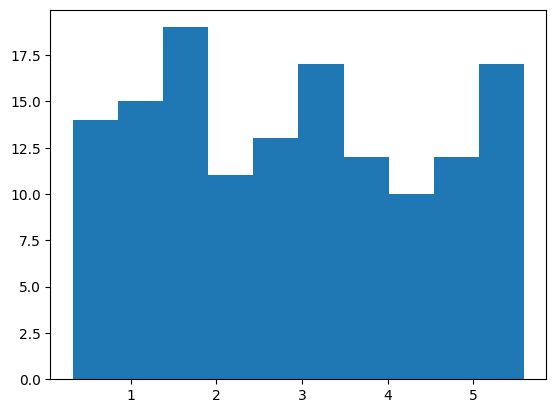

In [17]:
import numpy
import matplotlib.pyplot as plt
x = numpy.random.uniform(0.1,5.6,140)
plt.hist(x,10)
print(x)